In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
train_data=datasets.MNIST(root='./data',train=True,transform=transform,download=False)
test_data=datasets.MNIST(root='./data',train=False,transform=transform,download=False)

In [27]:
print(len(train_data))
print(len(test_data))

60000
10000


In [28]:
train_loader=DataLoader(dataset=train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=64, shuffle=False)

In [29]:
data_iter=iter(train_loader)
images,labels=next(data_iter)

In [30]:
images.shape

torch.Size([64, 1, 28, 28])

In [31]:
labels.shape

torch.Size([64])

In [32]:
images[0].shape

torch.Size([1, 28, 28])

In [33]:
images[0].squeeze().shape

torch.Size([28, 28])

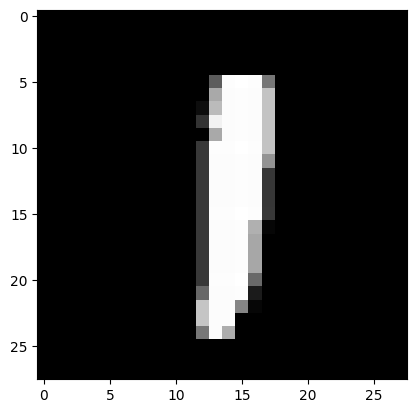

In [34]:
plt.Figure(figsize=(10,10))
plt.imshow(images[7].squeeze(),cmap='gray')
plt.show()

In [35]:
class MINTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
                nn.Flatten(),
                nn.Linear(28*28,128),
                nn.ReLU(),
                nn.Linear(128,64),
                nn.ReLU(),
                nn.Linear(64,10)
            )
    def forward(self,x):
        return self.network(x)

In [39]:
model=MINTCNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.002)

In [ ]:
#now train the model
epochs=10
for epoch in range(epochs):
    running_loss=0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 0.3503
Epoch [2/10], Loss: 0.1721
Epoch [3/10], Loss: 0.1334
Epoch [4/10], Loss: 0.1127


In [ ]:
model.eval()
total=0
correct=0
with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct +=(predicted==labels).sum().item()
print(f"Accuracy on the test set: {100*correct/total:.2f}%")
        

Accuracy on the test set: 97.40%


In [ ]:
# Save the model
# torch.save(model.state_dict(), 'digit_classifier.pth')

In [ ]:
#model = MINTCNN()
#model.load_state_dict(torch.load('digit_classifier.pth'))
#model.eval()

MINTCNN(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

F:\Resources_Digits_Classification\Download files\digit.py